**DATA ANALYTICS - EirGrid Intraday 15-minute 2014 Energy Demand**

In [1]:
#IMPORT ALL REQUIRED MODULES
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats 
import statsmodels.api as stats_model
from scipy.stats import ttest_ind
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

**QUESTION 1- Analysis of Seasonal Energy Demand Variations**

Historical intraday demand data can be used to study human behaviour and seasonality in
activity. Download the EirGrid intraday 15-minute energy demand data for the year 2014
from Canvas and save the data as a csv file with three columns for Date, Time and Demand.
Note the null values in the spreadsheet. Load the EirGrid system demand data into your
computer. Fix day-light saving issues and missing values using linear interpolation. Plot and
carefully label the time series of energy demand during 2014

In [2]:
#load the data
demand_data = pd.read_csv('EirGridSystemDemand2014.csv')

#Make a copy for changes
demand_df = demand_data.copy()

In [3]:
#check the head of the data
demand_df.head(2)

,Date,Time,Demand
0,1/1/2014,0:00,2899.0
1,1/1/2014,0:15,2869.0


In [4]:
#basic info of the data

demand_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    35040 non-null  object 
 1   Time    35040 non-null  object 
 2   Demand  35035 non-null  float64
dtypes: float64(1), object(2)
memory usage: 821.4+ KB


In [5]:
#Get sum of missing values
demand_df.isnull().sum()

Date      0
Time      0
Demand    5
dtype: int64

In [6]:
#Null-valued rows
missing_vals = demand_df[demand_df.isnull().any(axis=1)]
missing_vals

,Date,Time,Demand
8452,3/30/2014,1:00,NaN
8453,3/30/2014,1:15,NaN
8454,3/30/2014,1:30,NaN
8455,3/30/2014,1:45,NaN
21657,8/14/2014,14:15,NaN


In [7]:
#linearly interpolate missing values
demand_interpolated_df = demand_df.interpolate(method = 'linear')
#confirm interpolation
demand_interpolated_df.isnull().sum()

Date      0
Time      0
Demand    0
dtype: int64

In [8]:
#convert the date to date time in accordance with time
demand_interpolated_df['Date_Time'] = pd.to_datetime(demand_interpolated_df['Date'] + ' ' + demand_interpolated_df['Time'])

In [9]:
demand_interpolated_df.head(2)


,Date,Time,Demand,Date_Time
0,1/1/2014,0:00,2899.0,2014-01-01 00:00:00
1,1/1/2014,0:15,2869.0,2014-01-01 00:15:00


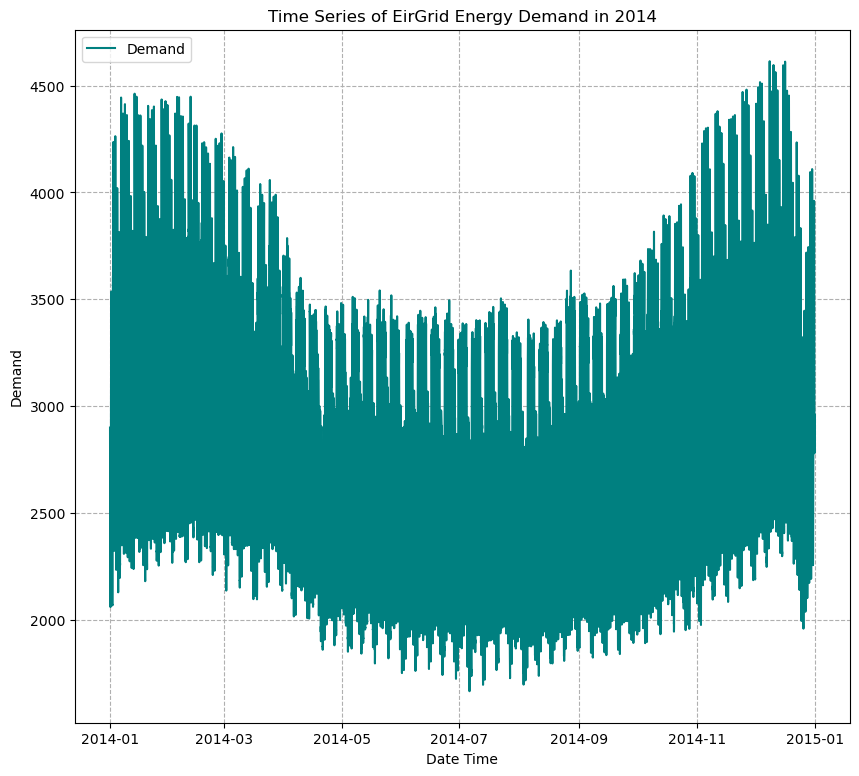

In [10]:
#Time series of EirGrid system demand 
plt.figure(figsize = (10,9))
plt.plot(demand_interpolated_df['Date_Time'], demand_interpolated_df['Demand'], color = 'teal', label='Demand')
plt.grid(linestyle = '--')
plt.title('Time Series of EirGrid Energy Demand in 2014')
plt.ylabel('Demand')
plt.legend()
plt.xlabel('Date Time')
plt.show()


**QUESTION 2- Autocorrelation Analysis of Energy Demand**

Estimate autocorrelation coefficients for 10 days and plot the autocorrelation against the
lag with axis labelled in days. Comment on the shape of the plot.

In [11]:
#Compute Autocorrelation coefficients of EirGrid Energy demand
num_lags = 10 * 24 * 4
autocorr_EirGrid = stats_model.tsa.stattools.acf(x=demand_interpolated_df['Demand'], 
                                                  adjusted=False, nlags=num_lags, qstat=False, 
                                                  fft=True, alpha=None, bartlett_confint=True, 
                                                  missing='none')

#calculating the significance critical values
num_data_points = len(demand_interpolated_df['Demand'])
crit_val_ = stats.norm.ppf(1 - 0.05 / 2) / np.sqrt(num_data_points)


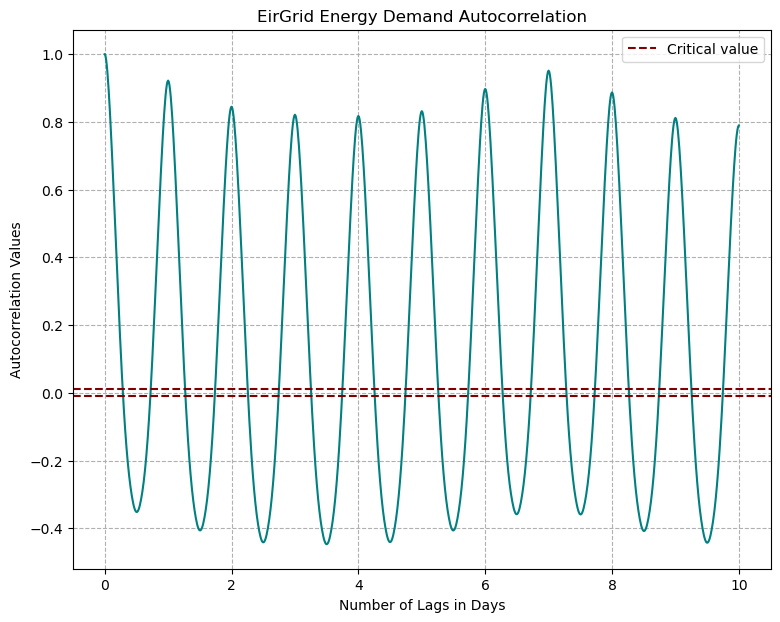

In [12]:
# Plot the ACF for wind generation
plt.figure(figsize=(9, 7))
days_per_lag = 15 / (60 * 24)
plt.plot(np.arange(0, num_lags+1) * days_per_lag, autocorr_EirGrid,linestyle='-', color='teal')
plt.axhline(y = crit_val_ , color='maroon', linestyle='--', label='Critical value')#Critical values
plt.axhline(y = -crit_val_  , color='maroon', linestyle='--')
plt.title("EirGrid Energy Demand Autocorrelation")
plt.grid(linestyle = '--')
plt.legend()
plt.xlabel("Number of Lags in Days")
plt.ylabel("Autocorrelation Values")
plt.show()

**QUESTION 3- Normalization and Trend Analysis of Energy Demands Throughout the Year**

Create a time of year variable that ranges between 0 and 1 and show how the demand
varies over the course of the year using a graphic

In [13]:
#reate time of the year variable by normalizing datetime
demand_interpolated_df['Time_of_Year']  = (demand_interpolated_df['Date_Time'] - demand_interpolated_df['Date_Time'].min()) / (demand_interpolated_df['Date_Time'].max() - demand_interpolated_df['Date_Time'].min())

In [14]:
demand_interpolated_df.tail(2)

,Date,Time,Demand,Date_Time,Time_of_Year
35038,12/31/2014,23:30,2957.0,2014-12-31 23:30:00,0.999971
35039,12/31/2014,23:45,2948.0,2014-12-31 23:45:00,1.000000


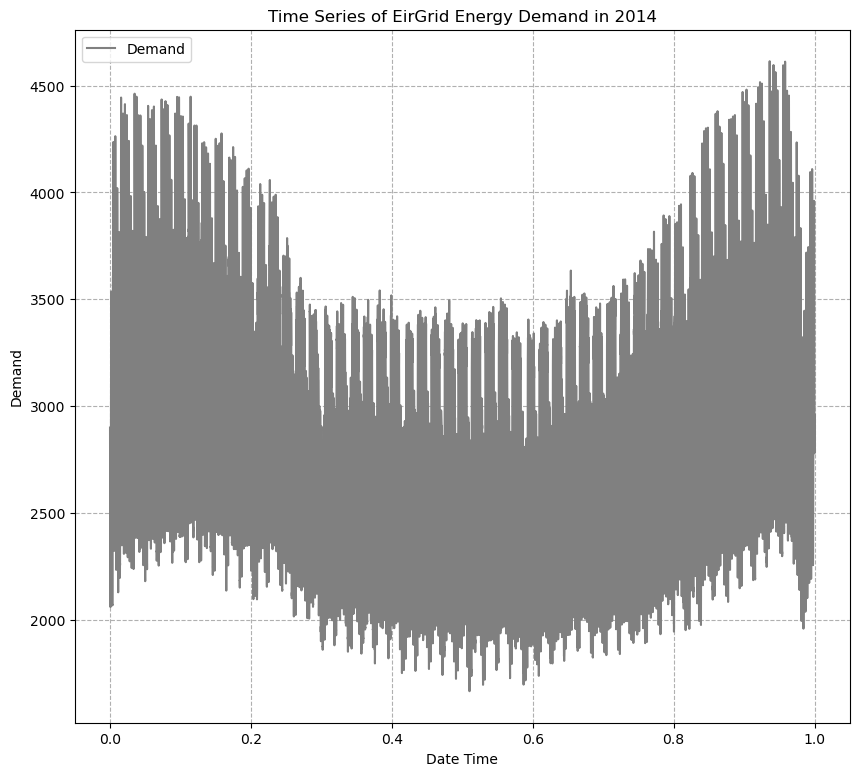

In [15]:
#Graphic to show change in demand using this new variable
#Time series of EirGrid system demand 
plt.figure(figsize = (10,9))
plt.plot(demand_interpolated_df['Time_of_Year'], demand_interpolated_df['Demand'], color = 'gray', label='Demand')
plt.grid(linestyle = '--')
plt.title('Time Series of EirGrid Energy Demand in 2014')
plt.ylabel('Demand')
plt.legend()
plt.xlabel('Date Time')
plt.show()


**QUESTION 4- Monthly Energy Demand Distribution Analysis**

For each of the 12 months of the year, calculate the average demand and display as a bar
chart and label appropriately.

In [16]:
# Calculate mean demand per month
demand_interpolated_df['Month'] = demand_interpolated_df['Date_Time'].dt.month
mean_DD_monthly = demand_interpolated_df.groupby('Month')['Demand'].mean()


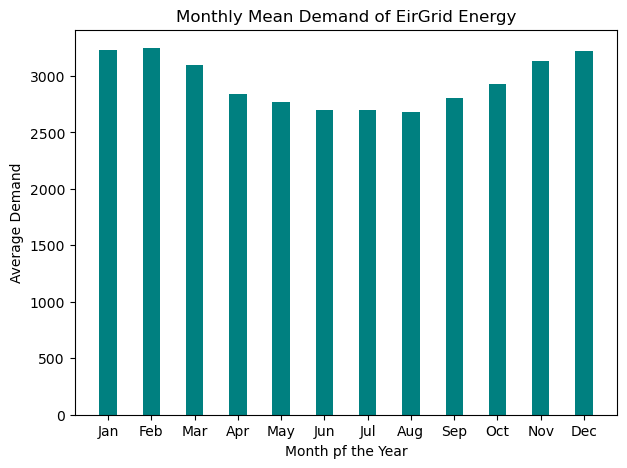

In [17]:
plt.figure(figsize=(7, 5))
plt.bar(mean_DD_monthly .index, mean_DD_monthly .values, color='teal', width=0.4)
plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Monthly Mean Demand of EirGrid Energy')
plt.xlabel('Month pf the Year')
plt.ylabel('Average Demand')
plt.show()

**QUESTION 5 Daily Energy Demand Profile Analysis**

For each of the 24 hours of the day, calculate the average demand and display it as a bar
chart, indicating the different hours of the day. This graphic is often referred to as the daily
demand profile


In [18]:
# Calculate mean demand per Hour of the day
demand_interpolated_df['Hour'] = demand_interpolated_df['Date_Time'].dt.hour
mean_DD_Hourly = demand_interpolated_df.groupby('Hour')['Demand'].mean()


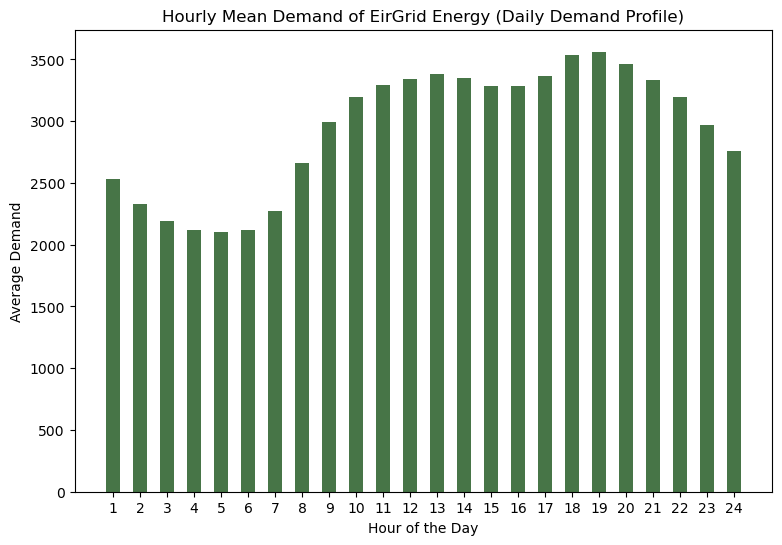

In [19]:
color = (0.2, 0.4, 0.2, 0.9 )
plt.figure(figsize=(9, 6))
plt.bar(mean_DD_Hourly.index + 1, mean_DD_Hourly.values, color=color, width=0.5)
plt.xticks(np.arange(1,25))
plt.title('Hourly Mean Demand of EirGrid Energy (Daily Demand Profile)')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Demand')
plt.show()

**QUESTION 6 - Weekly Patterns in Energy Demand**

For each of the seven days of the week, calculate the average demand and display it as a
bar chart. Does the result make sense based on intuition about electricity consumption?

In [21]:
# Calculate mean demand per Day of the week
demand_interpolated_df['Day_of_Week'] = demand_interpolated_df['Date_Time'].dt.dayofweek
mean_DD_DayOfWeek = demand_interpolated_df.groupby('Day_of_Week')['Demand'].mean()


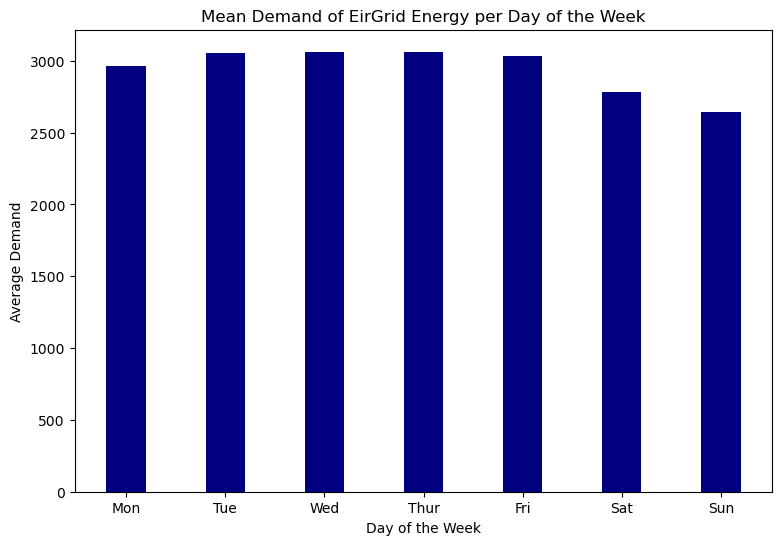

In [22]:
color = (0.2, 0.4, 0.2, 0.9 )
plt.figure(figsize=(9, 6))
plt.bar(mean_DD_DayOfWeek.index, mean_DD_DayOfWeek.values, color= 'navy', width=0.4)
plt.xticks(np.arange(7), ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])
plt.title('Mean Demand of EirGrid Energy per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Demand')
plt.show()

**QUESTION 7 Hourly Energy Demand by Day of the Week**

Calculate a daily demand profile for each day of the week. This can be achieved by
selecting a specific hour for each day and computing the average. Show the results on a
graphic with a separate profile curve for each day

In [23]:
demand_interpolated_df.head(2)

,Date,Time,Demand,Date_Time,Time_of_Year,Month,Hour,Day_of_Week
0,1/1/2014,0:00,2899.0,2014-01-01 00:00:00,0.000000,1,0,2
1,1/1/2014,0:15,2869.0,2014-01-01 00:15:00,0.000029,1,0,2


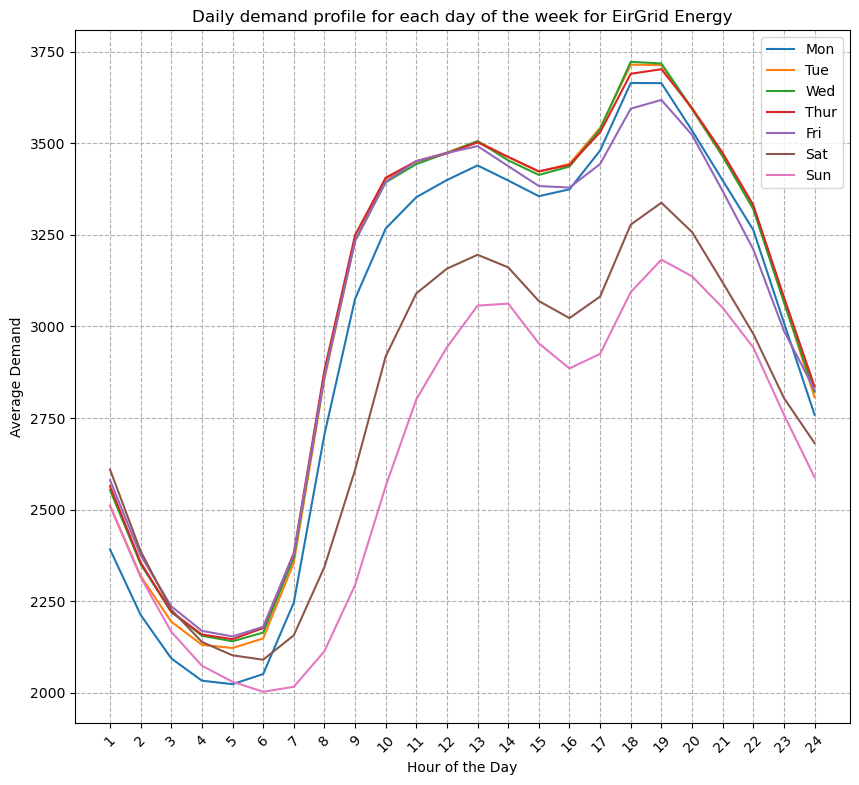

In [24]:
#calculate Demand Daily profile
plt.figure(figsize = (10,9))
days_of_week =  ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
for day, day_name in zip(range(0,7),days_of_week):
    daily_profile_DoW = demand_interpolated_df[demand_interpolated_df['Day_of_Week'] == day].groupby('Hour')['Demand'].mean()
    plt.plot( daily_profile_DoW.index,  daily_profile_DoW .values, label = day_name)
plt.xticks(np.arange(24), [f'{hour+1}' for hour in range(24)], rotation=45) 
plt.title('Daily demand profile for each day of the week for EirGrid Energy')
plt.ylabel('Average Demand')
plt.grid(linestyle='--')
plt.xlabel('Hour of the Day')
plt.legend()
plt.show()

**QUESTION 8- Statistical Test for Weekday versus Weekend Energy Demand**

Is there a statistically significant difference between demand during the weekend
(Saturday and Sunday) and during the working week (Monday through Friday)? Perform a
statistical hypothesis test, such as a t-test, in order to reach a conclusion

In [25]:
#Null hypothesis: There is no difference between the mean of the weekday energy consumption and 
                   # the mean of weekend energy consumption

#Alternative: The mean of the weekday energy consumption is different from the mean of weekend energy consumption

#Get the weekday and Weekend energy consumption values
Weekday_consump = demand_interpolated_df[(demand_interpolated_df['Day_of_Week'] >=0) & (demand_interpolated_df['Day_of_Week'] <5 )]
Weekend_consump = demand_interpolated_df[(demand_interpolated_df['Day_of_Week'] >4)]

In [26]:
#Ttest using scipy stats's  ttest_ind function
_, p_value = ttest_ind(Weekday_consump['Demand'],Weekend_consump['Demand'])

In [27]:
if p_value < 0.05:
    print(f'The P-value of {p_value} obtained is less than 0.05 \n Therefore, there is a significant difference between the weekend and weekday energy demand')
    
else:
    print(f' There is no significant difference between the weekend and weekday energy demand')

The P-value of 0.0 obtained is less than 0.05 
 Therefore, there is a significant difference between the weekend and weekday energy demand


**QUESTION 9 - Forecasting Accuracy Analysis Using MAE for Energy Demand**

Divide the data into two halves and use the second half for evaluation purposes. Study
the simple benchmark forecasting approach known as persistence. For data that does not
change much from one time step to the next, we can assume that the most recent
observations are a good forecast of the future. The forecast issued at time t for k periods
ahead is simply given by y_hat(t+k) = y(t). Calculate the mean absolute error (MAE) and
plot it against forecast horizons for lead times up to one day ahead


In [30]:
#Dividing the data into two halves

train_, eval_ = demand_interpolated_df[:len(demand_interpolated_df)//2], demand_interpolated_df[len(demand_interpolated_df)//2:]


In [31]:
#reindex eval_
eval_ = eval_.reset_index(drop = True)

In [32]:

#persistence forecast model

one_day_horizon = 24 * 4
horizons = range(1, one_day_horizon + 1)

MAE_vals = [] #list to store the MAE values

for hor in horizons:
    forecast_demand = demand_interpolated_df['Demand'].shift(hor)
    #compute MAE using mean_absolute_error
    model_MAE = mean_absolute_error(eval_['Demand'], forecast_demand[len(forecast_demand)//2:])
    MAE_vals.append(model_MAE)
     

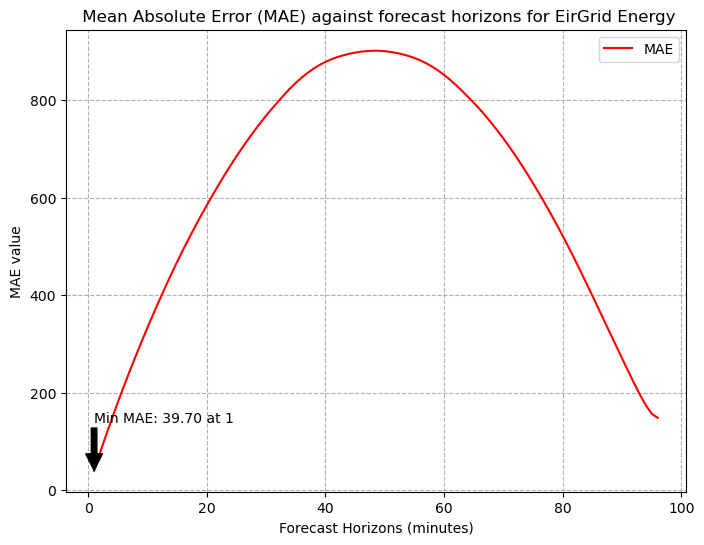

In [33]:
#Plot MAE against Lead times
plt.figure(figsize = (8,6))
plt.plot(horizons, MAE_vals, label = 'MAE', color = 'red')
plt.title(' Mean Absolute Error (MAE) against forecast horizons for EirGrid Energy')
plt.ylabel('MAE value')
plt.grid(linestyle='--')
plt.xlabel('Forecast Horizons (minutes)')
# Annotate the minimum point
min_MAE = min(MAE_vals)
min_horizon = horizons[MAE_vals.index(min_MAE)]
plt.annotate(f'Min MAE: {min_MAE:.2f} at {min_horizon}',
             xy=(min_horizon, min_MAE),
             xytext=(min_horizon, min_MAE + 100),  # Adjust the text position
             arrowprops=dict(facecolor='black', shrink=0.005))

plt.legend()
plt.show()

**QUESTION 10 - Forecasting Accuracy Analysis Using MAPE for Energy Demand**

Calculate the mean absolute percentage error for the persistence and plot this against
the forecast horizon up to one day ahead. Discuss and explain the shapes of the curves
showing performance against forecast horizons.



In [34]:

#persistence forecast model

one_day_horizon = 24 * 4
horizons = range(1, one_day_horizon + 1)

MAPE_vals = [] #list to store the MAE values

for hor in horizons:
    forecast_demand = demand_interpolated_df['Demand'].shift(hor)
    #compute MAE using mean_absolute_error
    model_MAPE = mean_absolute_percentage_error(eval_['Demand'], forecast_demand[len(forecast_demand)//2:])
    MAPE_vals.append(model_MAPE)
     

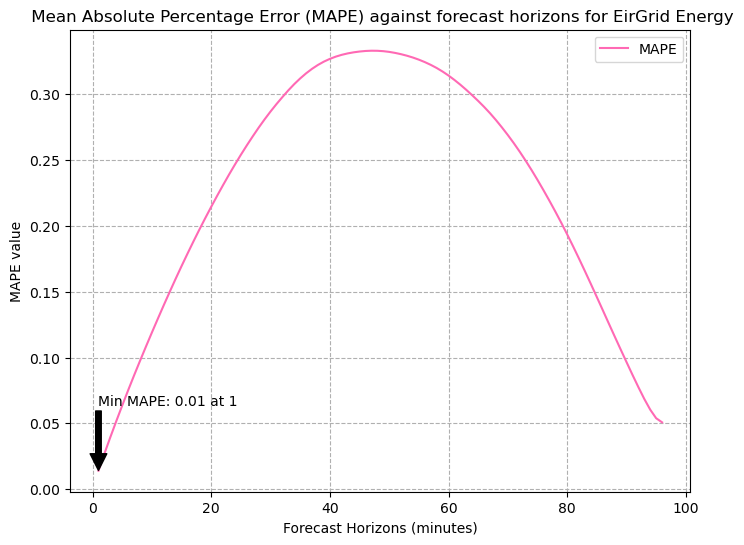

In [35]:
#Plot MAE against Lead times
plt.figure(figsize = (8,6))
plt.plot(horizons, MAPE_vals, label = 'MAPE', color = 'hotpink')
plt.title(' Mean Absolute Percentage Error (MAPE) against forecast horizons for EirGrid Energy')
plt.ylabel('MAPE value')
plt.grid(linestyle='--')
plt.xlabel('Forecast Horizons (minutes)')
# Annotate the minimum point
min_MAPE = min(MAPE_vals)
min_horizon = horizons[MAPE_vals.index(min_MAPE)]
plt.annotate(f'Min MAPE: {min_MAPE:.2f} at {min_horizon}',
             xy=(min_horizon, min_MAPE),
             xytext=(min_horizon, min_MAPE + 0.05),  # Adjust the text position
             arrowprops=dict(facecolor='black', shrink=0.005))
plt.legend()
plt.show()